In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Dhaka Rent.csv",sep=';')


In [4]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [5]:
df.shape

(60, 2)

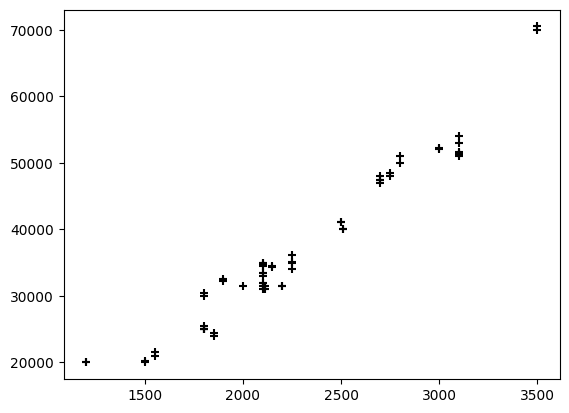

In [6]:
plt.scatter(df.area,df.rent,color='black',marker='+')

In [7]:
#area is independent feature, x
#rent is dept. y
x=df['area']
y=df['rent']

In [8]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [9]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

Text(0.5, 1.0, 'area-rent visualization')

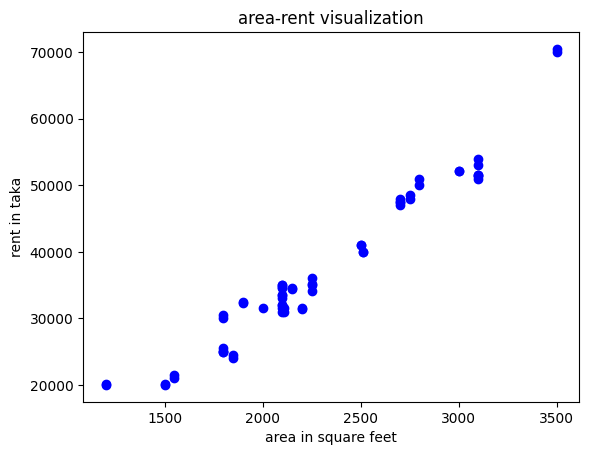

In [10]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')

In [11]:
x.mean()

2289.0

In [12]:
y.mean()

37269.166666666664

In [13]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [14]:
mean_x

2289.0

In [15]:
mean_y

37269.166666666664

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = df.drop('rent', axis=1) # 1 for col and 0 for rows ; df[['area']] 
y = df[['rent']]

In [18]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [19]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=.25,random_state=1)

In [21]:
xtrain.head()

,area
36,1500
21,2100
10,2150
52,3500
19,2700


In [22]:
ytrain.head()

,rent
36,20200
21,33500
10,34500
52,70500
19,47000


In [23]:
xtest.head()

,area
39,2100
41,2100
2,2500
48,1800
50,2110


In [24]:
ytest.head()

,rent
39,31500
41,32020
2,41050
48,25500
50,31000


In [25]:
xtest.shape

(15, 1)

In [26]:
xtrain.shape

(45, 1)

Linear Regression

In [27]:
#https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression() #object created lr<

In [29]:
lr.fit(xtrain,ytrain) #training model

LinearRegression()

In [30]:
m=lr.coef_ #coefficeint
m

array([[21.68780639]])

In [31]:
c=lr.intercept_ 
c

array([-12460.41329719])

In [32]:
yp=(m*1800+c)
yp

array([[26577.63819999]])

In [33]:
yp=(m*2250+c)
yp

array([[36337.15107429]])

In [34]:
lr.predict([[2200]])

array([[35252.76075492]])

In [35]:
df['predicted_rent']=lr.predict(x)

In [36]:
df.head()

,area,rent,predicted_rent
0,2000,31500,30915.199477
1,2100,35000,33083.980116
2,2500,41050,41759.102671
3,2250,36100,36337.151074
4,3000,52100,52603.005865


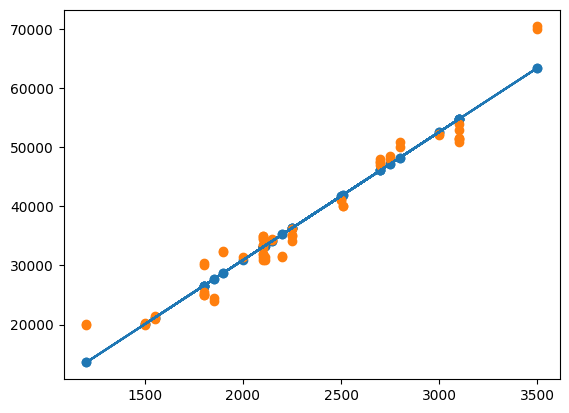

In [37]:
plt.plot(x,df[['predicted_rent']]) #plt.plot(x.squeeze(),df[['predicted_rent']])
plt.scatter(x,df[['predicted_rent']])
plt.scatter(x,df[['rent']])

In [38]:
from sklearn.metrics  import mean_squared_error ,mean_absolute_error

In [39]:
mse=mean_squared_error(ytest,lr.predict(xtest))
mae=mean_absolute_error(ytest,lr.predict(xtest))

In [40]:
mse

5816210.138113206

In [41]:
mae

1828.0513339512015

In [42]:
lr.score(xtest,ytest)

0.9022409645314653

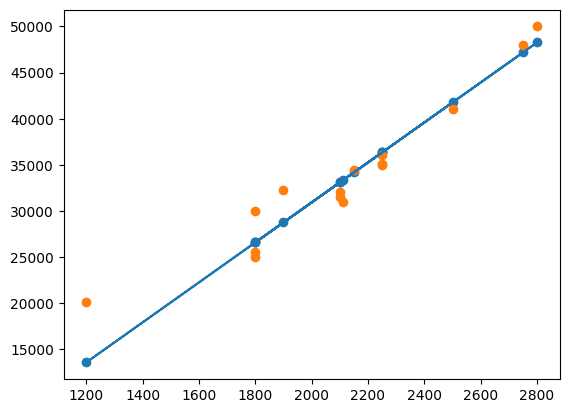

In [43]:
plt.plot(xtest,lr.predict(xtest))
plt.scatter(xtest,lr.predict(xtest))
plt.scatter(xtest,ytest)

In [44]:
lr.predict([[2000]])

array([[30915.19947746]])

In [45]:
lr.predict([[5000]])

array([[95978.61863942]])

Save AI Model

In [46]:
import pickle

In [47]:
pickle.dump(lr,open('my_lr1','wb')) #wb=write binary ,as we going to save it

In [48]:
import joblib as jb
jb.dump(lr,'my_lr2')

['my_lr2']